In [3]:
import requests

def download_file(url, filename):
    # Send a GET request
    response = requests.get(url, stream=True)

    # Open the file to write the content
    with open(filename, 'wb') as file:
        total_downloaded = 0
        total_size = int(response.headers.get('content-length', 0))

        # Write the content in chunks and show progress
        for chunk in response.iter_content(chunk_size=1024):
            if chunk:
                file.write(chunk)
                total_downloaded += len(chunk)
                print(f"Downloaded {total_downloaded} of {total_size} bytes", end="\r")

# Example usage
url = 'http://ufldl.stanford.edu/housenumbers/train_32x32.mat'  # Replace with the file's URL
filename = 'train_32x32.mat'

url2 = 'http://ufldl.stanford.edu/housenumbers/test_32x32.mat'  # Replace with the file's URL
filename2 = 'test_32x32.mat'

download_file(url, filename)
download_file(url2, filename2)


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
train_data = loadmat("train_32x32.mat")
test_data = loadmat("test_32x32.mat")

In [6]:
X_train = train_data['X']
y_train = train_data['y'].flatten()

X_test = test_data['X']
y_test = test_data['y'].flatten()


In [7]:
y_train[y_train == 10] = 0
y_test[y_test == 10] = 0

In [8]:
X_train = np.moveaxis(X_train, -1, 0)
X_test = np.moveaxis(X_test, -1, 0)

In [9]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0


In [10]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


In [11]:
train_datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow(X_train, y_train, batch_size=64)

In [12]:
model = models.Sequential()

In [13]:
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
model.fit(train_generator, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1145/1145 ━━━━━━━━━━━━━━━━━━━━ 74s 56ms/step - accuracy: 0.2728 - loss: 2.0420 - val_accuracy: 0.7610 - val_loss: 0.8307
Epoch 2/20
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 61s 53ms/step - accuracy: 0.6274 - loss: 1.1488 - val_accuracy: 0.8259 - val_loss: 0.6349
Epoch 3/20
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 60s 52ms/step - accuracy: 0.7143 - loss: 0.9130 - val_accuracy: 0.8659 - val_loss: 0.5032
Epoch 4/20
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 83s 52ms/step - accuracy: 0.7476 - loss: 0.8195 - val_accuracy: 0.8750 - val_loss: 0.4522
Epoch 5/20
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 59s 52ms/step - accuracy: 0.7707 - loss: 0.7462 - val_accuracy: 0.8856 - val_loss: 0.4132
Epoch 6/20
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 61s 53ms/step - accuracy: 0.7874 - loss: 0.6986 - val_accuracy: 0.8896 - val_loss: 0.3884
Epoch 7/20
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 96s 84ms/step - accuracy: 0.8011 - loss: 0.6564 - val_accuracy: 0.8969 - val_loss: 0.3717
Epoch 8/20
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 59s 51ms/step - accuracy: 0.8133 - loss: 0.62

In [ ]:
# Save the trained model
model.save('trained_model.h5')
print("Model saved successfully!")


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Assuming the model has already been trained and is loaded

def predict_digit(img_path, model):
    """
    This function takes an image path, processes the image, and predicts the digit using the trained model.

    Args:
    img_path (str): Path to the input image.
    model (Keras model): The trained CNN model.

    Returns:
    int: Predicted digit (0-9).
    """

    # Load the image
    img = image.load_img(img_path, target_size=(32, 32))  # Resize to 32x32
    plt.imshow(img)
    plt.show()

    # Convert the image to a numpy array
    img_array = image.img_to_array(img)

    # Normalize the image
    img_array = img_array.astype('float32') / 255.0

    # Expand dimensions to match the input shape of the model [1, 32, 32, 3]
    img_array = np.expand_dims(img_array, axis=0)

    # Predict the class (digit) using the model
    prediction = model.predict(img_array)

    # Get the index (digit) with the highest probability
    predicted_digit = np.argmax(prediction)

    print(f"The predicted digit is: {predicted_digit}")
    return predicted_digit

# Example usage:
# Assuming you have trained the model and saved it as 'trained_model.h5'
# model = models.load_model('trained_model.h5')
# predict_digit('path_to_image.png', model)
model = models.load_model('trained_model.h5')

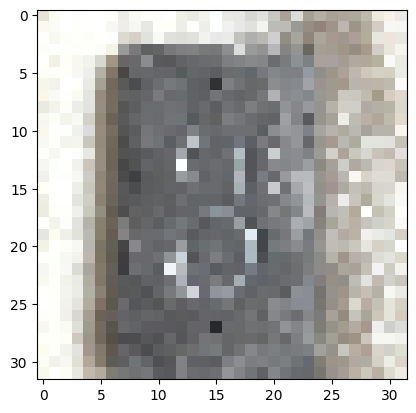

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
The predicted digit is: 3


3

In [19]:
predict_digit("test_image.png", model)